In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

In [17]:
df = pd.read_csv("../proc_data/ethylene_CO_reduced.csv")
X = df.drop('Conc_CO', axis=1)
X = X.drop('Conc_Eth',axis=1)
X = X.drop('Time',axis=1)
y = df['Conc_CO']
print(df.head())

   Unnamed: 0   feature1   feature2    feature3  Time  Conc_CO  Conc_Eth
0           0  95.491605  59.587419  146.399875  0.00      0.0       0.0
1           1  93.642659  58.152907  144.379185  0.01      0.0       0.0
2           2  91.838238  56.456950  142.555734  0.01      0.0       0.0
3           3  90.017108  54.859652  140.602529  0.03      0.0       0.0
4           4  88.485368  53.385325  139.152025  0.04      0.0       0.0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear Regression

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 14172.817658157175
R-squared (R2) Score: 0.45165675393569205
MAPE Score: 1.7123915740473962e+17


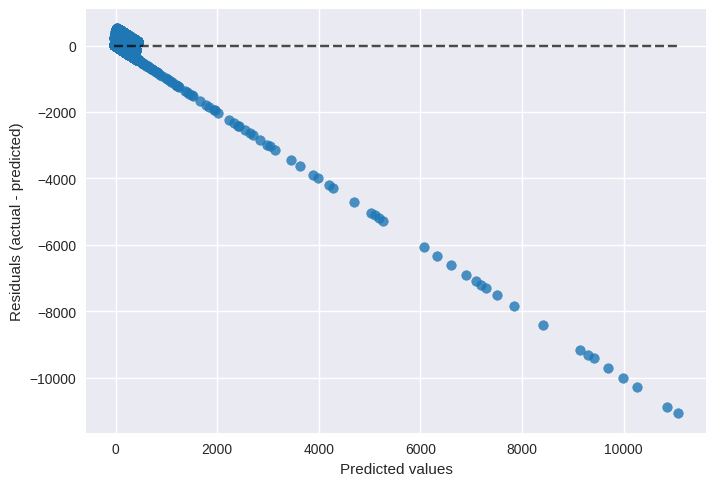

In [19]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

### LASSO Regression

In [20]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 14169.48342661805
R-squared (R2) Score: 0.4517857546319116
MAPE Score: 1.7212904410106458e+17


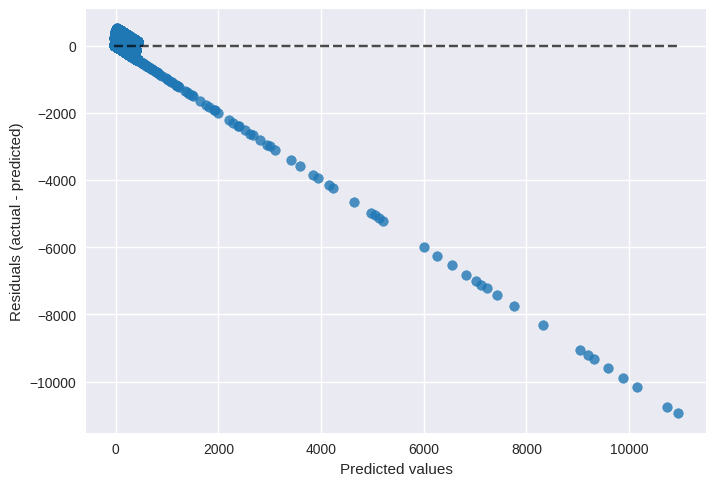

In [21]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

### Ridge Regression

In [22]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 14172.81758458868
R-squared (R2) Score: 0.4516567567820413
MAPE Score: 1.7123917012443386e+17


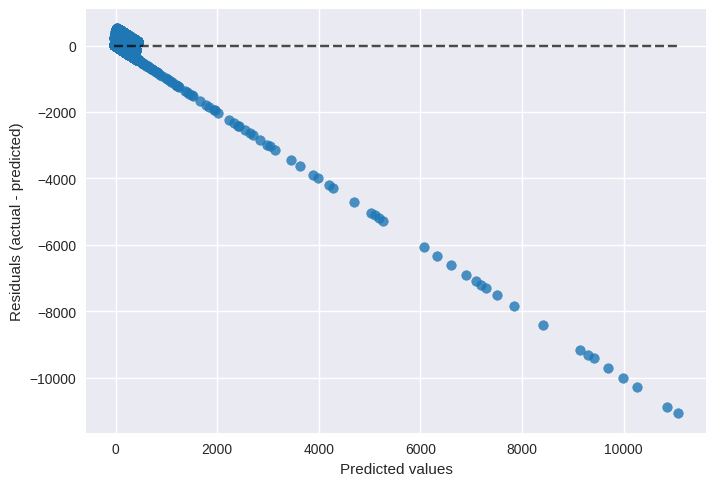

In [23]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

### Decision Tree Regression

In [4]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 49.058852575776285
R-squared (R2) Score: 0.998101923617559


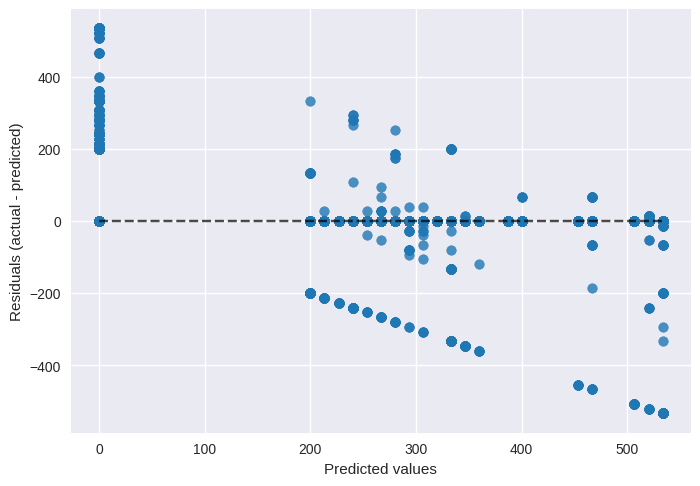

In [5]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()

In [5]:
residuals = y_test - y_pred

mean_residual = np.mean(residuals)
variance_residual = np.var(residuals)
print(f"Mean of Residuals: {mean_residual}")
print(f"Variance of Residuals: {variance_residual}")

Mean of Residuals: 0.010445926378563602
Variance of Residuals: 49.05874345839836


### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 4  # You can change this to the desired polynomial degree
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print("R-squared (R2) Score:", r2)

Mean Squared Error: 13737.265332252806
R-squared (R2) Score: 0.4685081791058876
MAPE Score: 1.831460758972292e+17


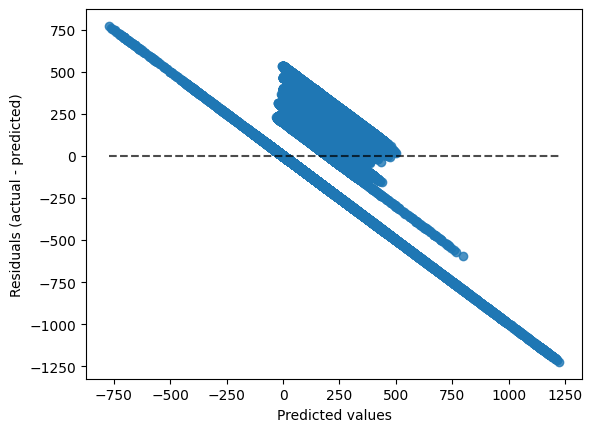

In [ ]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.show()